The notebook is to use and try the xgb class trainning model

In [1]:
# DictVectorizer
from sklearn.feature_extraction import DictVectorizer

# XGB
import xgboost as xgb

# cross_val_score
from sklearn.model_selection import cross_val_score

# Import pandas
import pandas as pd


from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

from pyspark.sql.functions import desc,asc, monotonically_increasing_id, split, size, length

# Plot AUC *(Self Defined Package)
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [2]:
%run /Users/p0z00cx/jupter/product_weather_prediction/lib/production_utility.ipynb

In [3]:
%run /Users/p0z00cx/jupter/product_weather_prediction/lib/roc_auc.ipynb

In [4]:
test_data_set = spark.read.csv('/Users/p0z00cx/hactron_product/test_data_set.csv', header="true", inferSchema="true")
display(test_data_set.toPandas())

,item_desc,dept_desc,state,region,inspected_result,dc_name,prcp_aver,tavg,result
0,BLACKBERRY 12OZ,BLACKBERRIES,California,Watsonville,rejected,"PAULS VALLEY, OK GDC",0.0,70.000000,0
1,BLACKBERRY 12OZ,BLACKBERRIES,California,Oxnard,accepted,"CLARKSVILLE, AR GDC",0.0,70.000000,1
2,STRAWBERRY 2#,STRAWBERRIES,Michoacan,Zamora,aminus,"AUBURN, IN GDC",0.0,70.000000,1
3,STRAWBERRY 2#,STRAWBERRIES,California,Santa Maria,accepted,"COLTON, CA FRESH",0.0,70.000000,1
4,APPLE FUJI 3# 8,APPLES,Pennsylvania,South Central,accepted,"BEDFORD, PA GDC",0.0,156.473684,1
...,...,...,...,...,...,...,...,...,...
26165,AVO HASS 72 MX LGS,AVOCADOS,Michoacan,Uruapan,accepted,"BEDFORD, PA GDC",0.0,70.000000,1
26166,STRAWBERRY 1# SB,STRAWBERRIES,None,None,aminus,"NEW ALBANY, MS GDC",0.0,70.000000,1
26167,STRAWBERRY 2# SB,STRAWBERRIES,None,None,aminus,"MANKATO, MN GDC",0.0,70.000000,1
26168,PMPKN BIN 40 IHP,PUMPKINS SEASONAL,None,None,aminus,"BRUNDIDGE, AL GDC",0.0,70.000000,1


## Feature engineering

#### Department Desciption

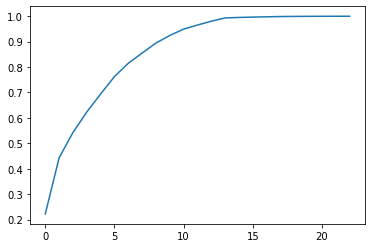

12


In [5]:
plot, n = varianceplot_nvalue("dept_desc", test_data_set )
print(n)

In [6]:
final_values = get_n_values(12, "dept_desc", test_data_set)
display(final_values)

['STRAWBERRIES',
 'APPLES',
 'RASPBERRIES',
 'ORG MIXED BERRIES',
 'LIMES',
 'BLUEBERRIES',
 'BLACKBERRIES',
 'PEARS',
 'STRAWBERRIES ORGANIC',
 'TOMATO ROMAS',
 'AVOCADOS',
 'TOMATO SMALLS']

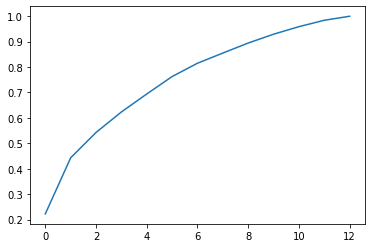

None

In [7]:
test_data_set = test_data_set.withColumn('dept_desc_new', udf(lambda x: new_col_values(x))("dept_desc"))
plot, n = varianceplot_nvalue("dept_desc_new", test_data_set )
display(plot)

### dc name

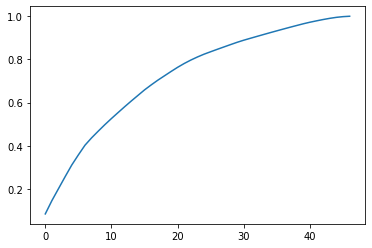

None

In [8]:
plot, n = varianceplot_nvalue("dc_name", test_data_set )
display(plot)

### product source table

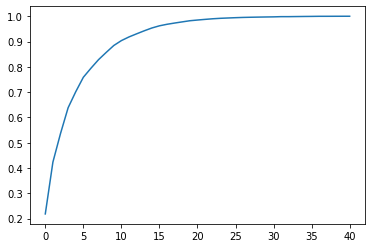

None

In [9]:
plot, n = varianceplot_nvalue("state", test_data_set )
display(plot)

In [10]:
final_values = get_n_values(26, "state", test_data_set)
test_data_set = test_data_set.withColumn('state_new', udf(lambda x: new_col_values(x))("state"))

In [11]:
display(test_data_set.toPandas())

,item_desc,dept_desc,state,region,inspected_result,dc_name,prcp_aver,tavg,result,dept_desc_new,state_new
0,BLACKBERRY 12OZ,BLACKBERRIES,California,Watsonville,rejected,"PAULS VALLEY, OK GDC",0.0,70.000000,0,BLACKBERRIES,California
1,BLACKBERRY 12OZ,BLACKBERRIES,California,Oxnard,accepted,"CLARKSVILLE, AR GDC",0.0,70.000000,1,BLACKBERRIES,California
2,STRAWBERRY 2#,STRAWBERRIES,Michoacan,Zamora,aminus,"AUBURN, IN GDC",0.0,70.000000,1,STRAWBERRIES,Michoacan
3,STRAWBERRY 2#,STRAWBERRIES,California,Santa Maria,accepted,"COLTON, CA FRESH",0.0,70.000000,1,STRAWBERRIES,California
4,APPLE FUJI 3# 8,APPLES,Pennsylvania,South Central,accepted,"BEDFORD, PA GDC",0.0,156.473684,1,APPLES,Pennsylvania
...,...,...,...,...,...,...,...,...,...,...,...
26165,AVO HASS 72 MX LGS,AVOCADOS,Michoacan,Uruapan,accepted,"BEDFORD, PA GDC",0.0,70.000000,1,AVOCADOS,Michoacan
26166,STRAWBERRY 1# SB,STRAWBERRIES,None,None,aminus,"NEW ALBANY, MS GDC",0.0,70.000000,1,STRAWBERRIES,
26167,STRAWBERRY 2# SB,STRAWBERRIES,None,None,aminus,"MANKATO, MN GDC",0.0,70.000000,1,STRAWBERRIES,
26168,PMPKN BIN 40 IHP,PUMPKINS SEASONAL,None,None,aminus,"BRUNDIDGE, AL GDC",0.0,70.000000,1,,


In [12]:
test_data_set = test_data_set.drop("inspected_result").drop("dept_desc").drop("state").drop("region")
df = test_data_set.toPandas()
df.isna().sum()

item_desc        0
dc_name          0
prcp_aver        0
tavg             0
result           0
dept_desc_new    0
state_new        0
dtype: int64

In [13]:
X= df.loc[:,['dept_desc_new','state_new','dc_name','prcp_aver','tavg']]
Y = df.result

In [14]:
column_trans = make_column_transformer(
    (OneHotEncoder(), ['dept_desc_new', 'state_new', 'dc_name']),
    remainder= 'passthrough'
)

In [15]:
logreg= LogisticRegression(solver='lbfgs',max_iter=7600)
pipe_logreg = make_pipeline(column_trans, logreg)

In [16]:
cross_val_score(pipe_logreg,X,Y,cv=3,scoring='accuracy').mean()

0.8286206493751536

In [17]:
test_data_set.toPandas().to_csv('/Users/p0z00cx/hactron_product/test_data_set_final.csv', header="true", index=None)